# Data Analysis for Social Sciences: Lab 6
***UNI:*** sk4819 | ***Date:*** December 11, 2021

In [1]:
#Importing libraries
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import linearmodels as lm

from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels import FirstDifferenceOLS

In [3]:
os.getcwd()

'/Users/shreyanskothari/Desktop/Data Analysis for Social Sciences/Labs/Lab 6'

In [4]:
gss = pd.read_csv("GSS.2006.csv.xls", sep = ',')

In [5]:
gss.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Run a naive ("pooled") OLS regression on the panel data.  Tell we how you expect your Xs to affect your Y and why.  Apply clustered standard errors too.  Interpret your results.

***I hope to explore how the number of years a respondent works at a job is related with that job's presitge score. Do people that work in 'prestigious' jobs work at that job for longer than people who do less prestigious jobs?
I will use `yearsjob` as my dependent variable and `prestg80` as my independent variable. In this model, I am also including `hrs1`, the number of hours the respondent worked in the week prior to taking the survey.***

I expect the two variables to be positively strongly related. My assumption is that the jobs that are generally associated with higher prestige are in the fields where individuals have to work for a lot of years (and go through many years of education) in order to get them. Following this logic, as the presitge grows, I would expect people to stay in those jobs for longer; if you put in a lot of work to get a job, I would expect you to stay in that job for a long time. 

I am very curious about how hrs worked relates to years at a job. I can think of examples that would argue both sides- a positive relation and a negative relation between hours worked and years at a job.

In [30]:
gss.yearsjob.describe()


count    1713.000000
mean        7.391273
std         8.610467
min         0.250000
25%         1.000000
50%         4.000000
75%        10.000000
max        60.000000
Name: yearsjob, dtype: float64

In [31]:
gss.prestg80.describe()

count    4270.000000
mean       44.167447
std        13.999459
min        17.000000
25%        33.000000
50%        43.000000
75%        51.000000
max        86.000000
Name: prestg80, dtype: float64

In [52]:
gss.hrs1.describe()

count    2739.000000
mean       42.076305
std        14.231662
min         1.000000
25%        38.000000
50%        40.000000
75%        50.000000
max        89.000000
Name: hrs1, dtype: float64

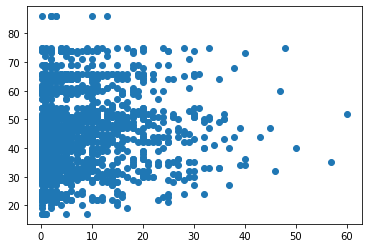

In [29]:
plt.scatter(gss['yearsjob'], gss['prestg80'])

I will first take the log of both of these continuous variables.

In [43]:
gss['lnyearsjob'] = np.log(gss['yearsjob']) 
gss['lnprestg'] = np.log(gss['prestg80']) 
gss['lnhrs'] = np.log(gss['hrs1']) 

In [44]:
gss[["yearsjob", "lnyearsjob", "prestg80", "lnprestg", "hrs1", "lnhrs"]].describe()

,yearsjob,lnyearsjob,prestg80,lnprestg,hrs1,lnhrs
count,1713.000000,1713.000000,4270.000000,4270.000000,2739.000000,2739.000000
mean,7.391273,1.209428,44.167447,3.735998,42.076305,3.661177
std,8.610467,1.424566,13.999459,0.327809,14.231662,0.455948
min,0.250000,-1.386294,17.000000,2.833213,1.000000,0.000000
25%,1.000000,0.000000,33.000000,3.496508,38.000000,3.637586
50%,4.000000,1.386294,43.000000,3.761200,40.000000,3.688879
75%,10.000000,2.302585,51.000000,3.931826,50.000000,3.912023
max,60.000000,4.094345,86.000000,4.454347,89.000000,4.488636


In [54]:
lm_ols = smf.ols(formula = 'yearsjob ~ prestg80 +hrs1', data = gss).fit()
print (lm_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               yearsjob   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.988
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           0.000131
Time:                        20:53:51   Log-Likelihood:                -5904.3
No. Observations:                1652   AIC:                         1.181e+04
Df Residuals:                    1649   BIC:                         1.183e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8332      0.880      4.354      0.0

In [55]:
lm_ols1 = smf.ols(formula = 'lnyearsjob ~ lnprestg +lnhrs', data = gss).fit()
print (lm_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             lnyearsjob   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     26.03
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           7.43e-12
Time:                        20:57:11   Log-Likelihood:                -2910.6
No. Observations:                1652   AIC:                             5827.
Df Residuals:                    1649   BIC:                             5843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0585      0.455     -4.529      0.0

___
## 2. Run a first differences regression on the same model in Question 1.  Interpret your results.  Do you draw a different conclusion than in Question 1?  Explain.